<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:green;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        0. Import Library and data
    </h3>
    </div>

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# For Collab use
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df =pd.read_csv('gdrive/MyDrive/CityU/ Courses/3. Junior/Semester B/SDSC2102/Group Project_SDSC2102/songs_normalize.csv')
df_cp = df.copy()
df_cp.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [7]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


<div style="color:black;
            display:fill;
            border-radius:1px;
            background-color:lightyellow;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    
* <b>artist</b>: Name of the Artist.<br>
* <b>song</b>:   Name of the Track.<br>
* <b>duration_ms</b>: Duration of the track in milliseconds.<br>
* <b>explicit</b>: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.<br>

* <b>year</b>: Release Year of the track.<br>
* <b>popularity</b>: The higher the value the more popular the song is.<br>
* <b>danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
    
* <b>energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.<br>
* <b>key</b>: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.<br>

* <b>loudness</b>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.<br>

* <b>mode</b>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>

* <b>speechiness</b>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>

* <b>acousticness</b>: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>

* <b>instrumentalness</b>: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>

* <b>liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>

* <b>valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>

* <b>tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.<br>

* <b>genre</b>: Genre of the track.<br>
    
    </div>

In [8]:
df_cp.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

### 1. Data Preprocessing (Univariate Analysis)

##### 1.1 Data Cleaning
- Missing values
- Duplicated values

In [9]:
# Getting the number of missing values
df_1 = df_cp.copy()
df_1.isnull().sum()

# import missingno as msno
# msno.matrix(df_1).get_figure().savefig('plot.png', bbox_inches = 'tight')

# NO MISSING DATA

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [10]:
# duplicate values
df_1.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [11]:
#dropping the duplicate values
df_1.drop_duplicates(inplace=True)
df_1.shape

(1941, 18)

#### 1.2 Data Transformation, Discretization & Feature Enginneering

In [12]:
# 1.2.1 Normalize  'duration_ms,' ‘danceability,’ ‘energy,’ 'loudness,' ‘speechiness,’ 
# ‘acousticness,’ ‘instrumentalness,’ ‘liveness,’ ‘valence,’ and 'tempo'  to be in the range (0, 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
      'acousticness', 'instrumentalness', 'liveness', 'valence', 
      'tempo']] = scaler.fit_transform(df_1[['duration_ms', 'danceability', 
                                             'energy', 'loudness', 'speechiness', 'acousticness', 
                                             'instrumentalness', 'liveness', 'valence', 'tempo']])

# df_1

In [13]:
df_1 = df_1.drop(['speechiness', 'liveness', 'valence', 'explicit', 'key', 'tempo'], axis = 1)

In [14]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1941.0,0.311454,0.105753,0.0,0.243856,0.296880,0.363593,1.0
year,1941.0,2009.520350,5.875532,1998.0,2004.000000,2010.000000,2015.000000,2020.0
popularity,1941.0,59.633179,21.501053,0.0,56.000000,65.000000,73.000000,89.0
danceability,1941.0,0.636896,0.166204,0.0,0.534279,0.646572,0.751773,1.0
energy,1941.0,0.706121,0.161923,0.0,0.602796,0.724605,0.831586,1.0
loudness,1941.0,0.741176,0.095807,0.0,0.692954,0.752495,0.807689,1.0
mode,1941.0,0.553323,0.497277,0.0,0.000000,1.000000,1.000000,1.0
acousticness,1941.0,0.131307,0.176831,0.0,0.013813,0.057154,0.180312,1.0
instrumentalness,1941.0,0.015607,0.089717,0.0,0.000000,0.000000,0.000070,1.0


In [15]:
# 1.2.2 One-hot the 'year' column, but binning first

songs_year = df_1.groupby("year").size().to_frame(name = 'songs').reset_index()
print(songs_year)  # (strat_train['year']).value_counts(dropna=False)

# Calculating the average of observations by year
print("Average of songs by year:",songs_year['songs'].mean(axis = 0))

# # Droping the 1998, 1999 and 2020 observations
# top_songs = df_cp[(df_cp.year >= 1999) & (df_cp.year <= 2019)]

# # Checking if the "year" is in the right range
# top_songs.groupby("year")["song"].count()

# top_songs.shape

df_1["year_group"] = pd.cut(df_1["year"],
                            bins = [1998,2005,2013,2020], # 8-8-7
                            labels = ['9805','0613','1420'], include_lowest=True)

df_1["year_group"].value_counts(dropna=False)

 # create one-hot
dum_year_group = pd.get_dummies(df_1['year_group'], prefix='year')
df_1 = df_1.drop(['year_group', 'year'], axis = 1)
df_1 = df_1.join(dum_year_group)

# df_1

    year  songs
0   1998      1
1   1999     38
2   2000     71
3   2001    106
4   2002     86
5   2003     91
6   2004     95
7   2005    101
8   2006     93
9   2007     90
10  2008     91
11  2009     82
12  2010    103
13  2011     96
14  2012    113
15  2013     87
16  2014    100
17  2015     93
18  2016     98
19  2017    110
20  2018    104
21  2019     89
22  2020      3
Average of songs by year: 84.3913043478261


In [16]:
# # 1.2.3 One-hot the 'explicit' column

# dum_explicit = pd.get_dummies(df_1['explicit'], prefix='explicit')
# df_1 = df_1.drop('explicit', axis = 1)
# df_1 = df_1.join(dum_explicit)
# # df_1

In [17]:
# # 1.2.4 One-hot the 'key' column

# dum_key = pd.get_dummies(df_1['key'], prefix='key')
# df_1 = df_1.drop('key', axis = 1)
# df_1 = df_1.join(dum_key)
# # df_1

In [18]:
# 1.2.5 One-hot the 'mode' column

dum_mode = pd.get_dummies(df_1['mode'], prefix='mode')
df_1 = df_1.drop('mode', axis = 1)
df_1 = df_1.join(dum_mode)
# df_1

In [19]:
# 1.2.6 One-hot the 'genre' column

def extract_genres(df_column): # Get labels
    df_column = [item.casefold() for item in df_column] #casefold all strings
    df_column = [item.split(', ') for item in df_column] #convert multiple genre strings into lists
    flat_list = [x for xs in df_column for x in xs] #flatten list of lists
    return list(np.unique(flat_list)) #return unique values in the flattened list

def get_genre_dummies(df,df_genre_column):
    df_genre_column = [item.casefold() for item in df_genre_column] #casefold all strings
    labels = extract_genres(df_genre_column) #Get unique labels of genres
    # print(labels)
    for i, item in enumerate(labels):
        df[labels[i]] = [1 if labels[i] in genre else 0 for genre in df_genre_column] #one-hot encoding

#Add dummy variables to indicate genre for each song
get_genre_dummies(df_1, df_1['genre'])

# df_1

In [20]:
print(df_1.shape)
# # genre column
# df_cp.genre.value_counts()

# Genre distribution
df_1[['blues','classical','country','dance/electronic','easy listening','folk/acoustic',
        'hip hop','jazz','latin','metal','pop','r&b','rock','set()','world/traditional']].sum()

(1941, 30)


blues                   4
classical               1
country                20
dance/electronic      380
easy listening          7
folk/acoustic          20
hip hop               751
jazz                    2
latin                  63
metal                  64
pop                  1582
r&b                   437
rock                  225
set()                  22
world/traditional      10
dtype: int64

In [21]:
# Cleaning the 'set()' values on 'genre' col
a = df_1.index[df_1.genre == "set()"]
# dfnan = df_1.iloc[a]
df_1 = df_1.drop(labels = a, axis=0)
df_1 = df_1.drop('genre', axis = 1)
df_1 = df_1.drop('set()', axis = 1)

df_1.shape

(1919, 28)

In [22]:
# 1.2.7 remove 'artist'
# Since there are so many different artists/songs, these two columns will most likely be dropped. 
# We will most likely create dummy variables for the columns 'year' and 'key'.

df_1['artist'].value_counts().sort_values(ascending=False).to_string()

'Drake                                        23\nRihanna                                      23\nEminem                                       21\nCalvin Harris                                20\nBritney Spears                               19\nDavid Guetta                                 18\nBeyoncé                                      16\nKanye West                                   16\nTaylor Swift                                 16\nKaty Perry                                   16\nChris Brown                                  16\nP!nk                                         14\nBlack Eyed Peas                              14\nAriana Grande                                13\nMaroon 5                                     13\nJAY-Z                                        12\nBruno Mars                                   11\nColdplay                                     11\nJason Derulo                                 11\nUsher                                        11\nJustin Timberlake  

In [23]:
df_1 = df_1.drop('artist', axis = 1)
df_1.shape

(1919, 27)

In [24]:
# 1.2.8 drop song 'name', bacause it's Identity
df_1.drop(columns = ['song'], inplace = True)
df_1.shape

(1919, 26)

<Axes: >

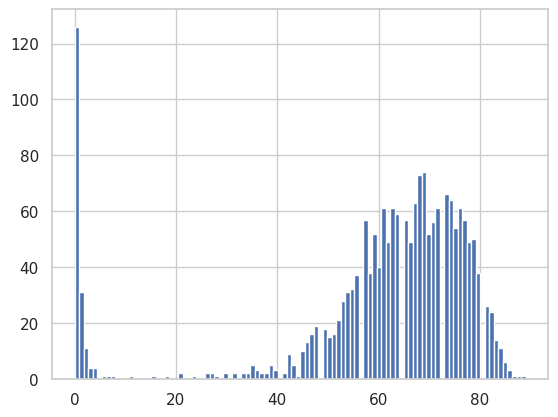

In [25]:
df_1["popularity"].hist(bins=100)

In [26]:
# 1.2.9 binning our target column "popularity" into 2 bins
pop_bins = [0,65,89]
df_1["popularity_group"] = pd.cut(df_1["popularity"],
                              bins = pop_bins,
                              labels = [0,1], include_lowest=True)

# Drop original popularity out
df_1 = df_1.drop('popularity', axis = 1)
df_1.shape

(1919, 26)

In [27]:
df_1["popularity_group"].value_counts(sort=False, dropna=False)

0    965
1    954
Name: popularity_group, dtype: int64

In [28]:
# # 1.2.9 binning our target column "popularity" into 3 bins
# # Check/Count values and Categorize into 3 intervals
# # categorize the popularity into different categories such as Low/Med/High.
# pop_bins = [0,60,70,89]
# df_1["popularity_group"] = pd.cut(df_1["popularity"],
#                               bins = pop_bins,
#                               labels = [0,1,2], include_lowest=True)

# df_1["popularity_group"].value_counts(sort=False, dropna=False)

# # Drop original popularity out
# df_1 = df_1.drop('popularity', axis = 1)
# df_1.shape

In [29]:
# df_1.describe().T

In [30]:
df_1

,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,year_9805,year_0613,year_1420,mode_0,...,folk/acoustic,hip hop,jazz,latin,metal,pop,r&b,rock,world/traditional,popularity_group
0,0.264478,0.735225,0.825230,0.744639,0.307363,0.000018,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0.145673,0.360520,0.891961,0.770630,0.010534,0.000000,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0.370598,0.472813,0.467217,0.568584,0.177238,0.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0.300402,0.498818,0.908908,0.812877,0.026928,0.000014,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0.235918,0.573286,0.924796,0.776164,0.041784,0.001056,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.183286,0.842790,0.719309,0.763366,0.043731,0.000000,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1996,0.176281,0.500000,0.685415,0.731643,0.119860,0.000021,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1997,0.236007,0.848700,0.659994,0.586965,0.068527,0.000000,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1998,0.156351,0.723404,0.492638,0.642405,0.461055,0.000002,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


#### 1.3 Correlation Matrix and Univariate Distribution

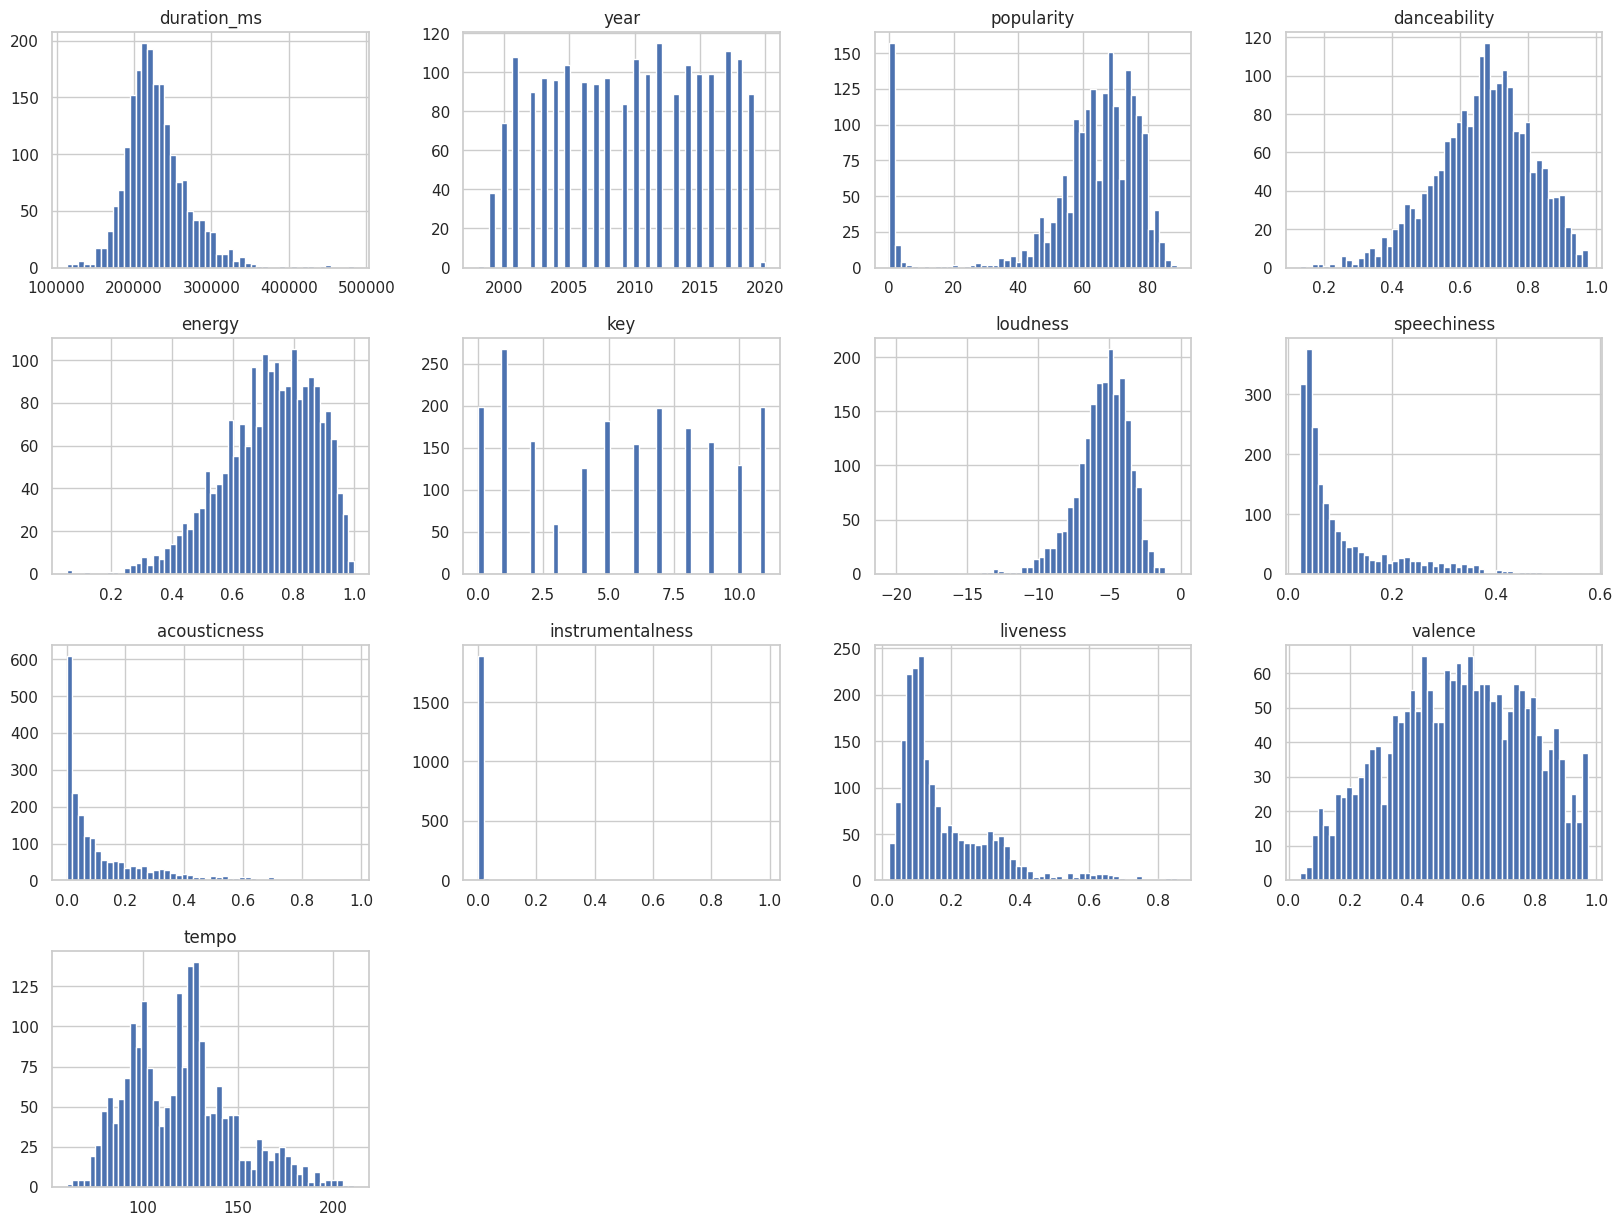

In [31]:
df_cp.drop('mode', axis = 1).hist(bins=50,figsize=(20,15))
# sns.set_palette('Greys_r')
# plt.show()
plt.savefig('hist.png')

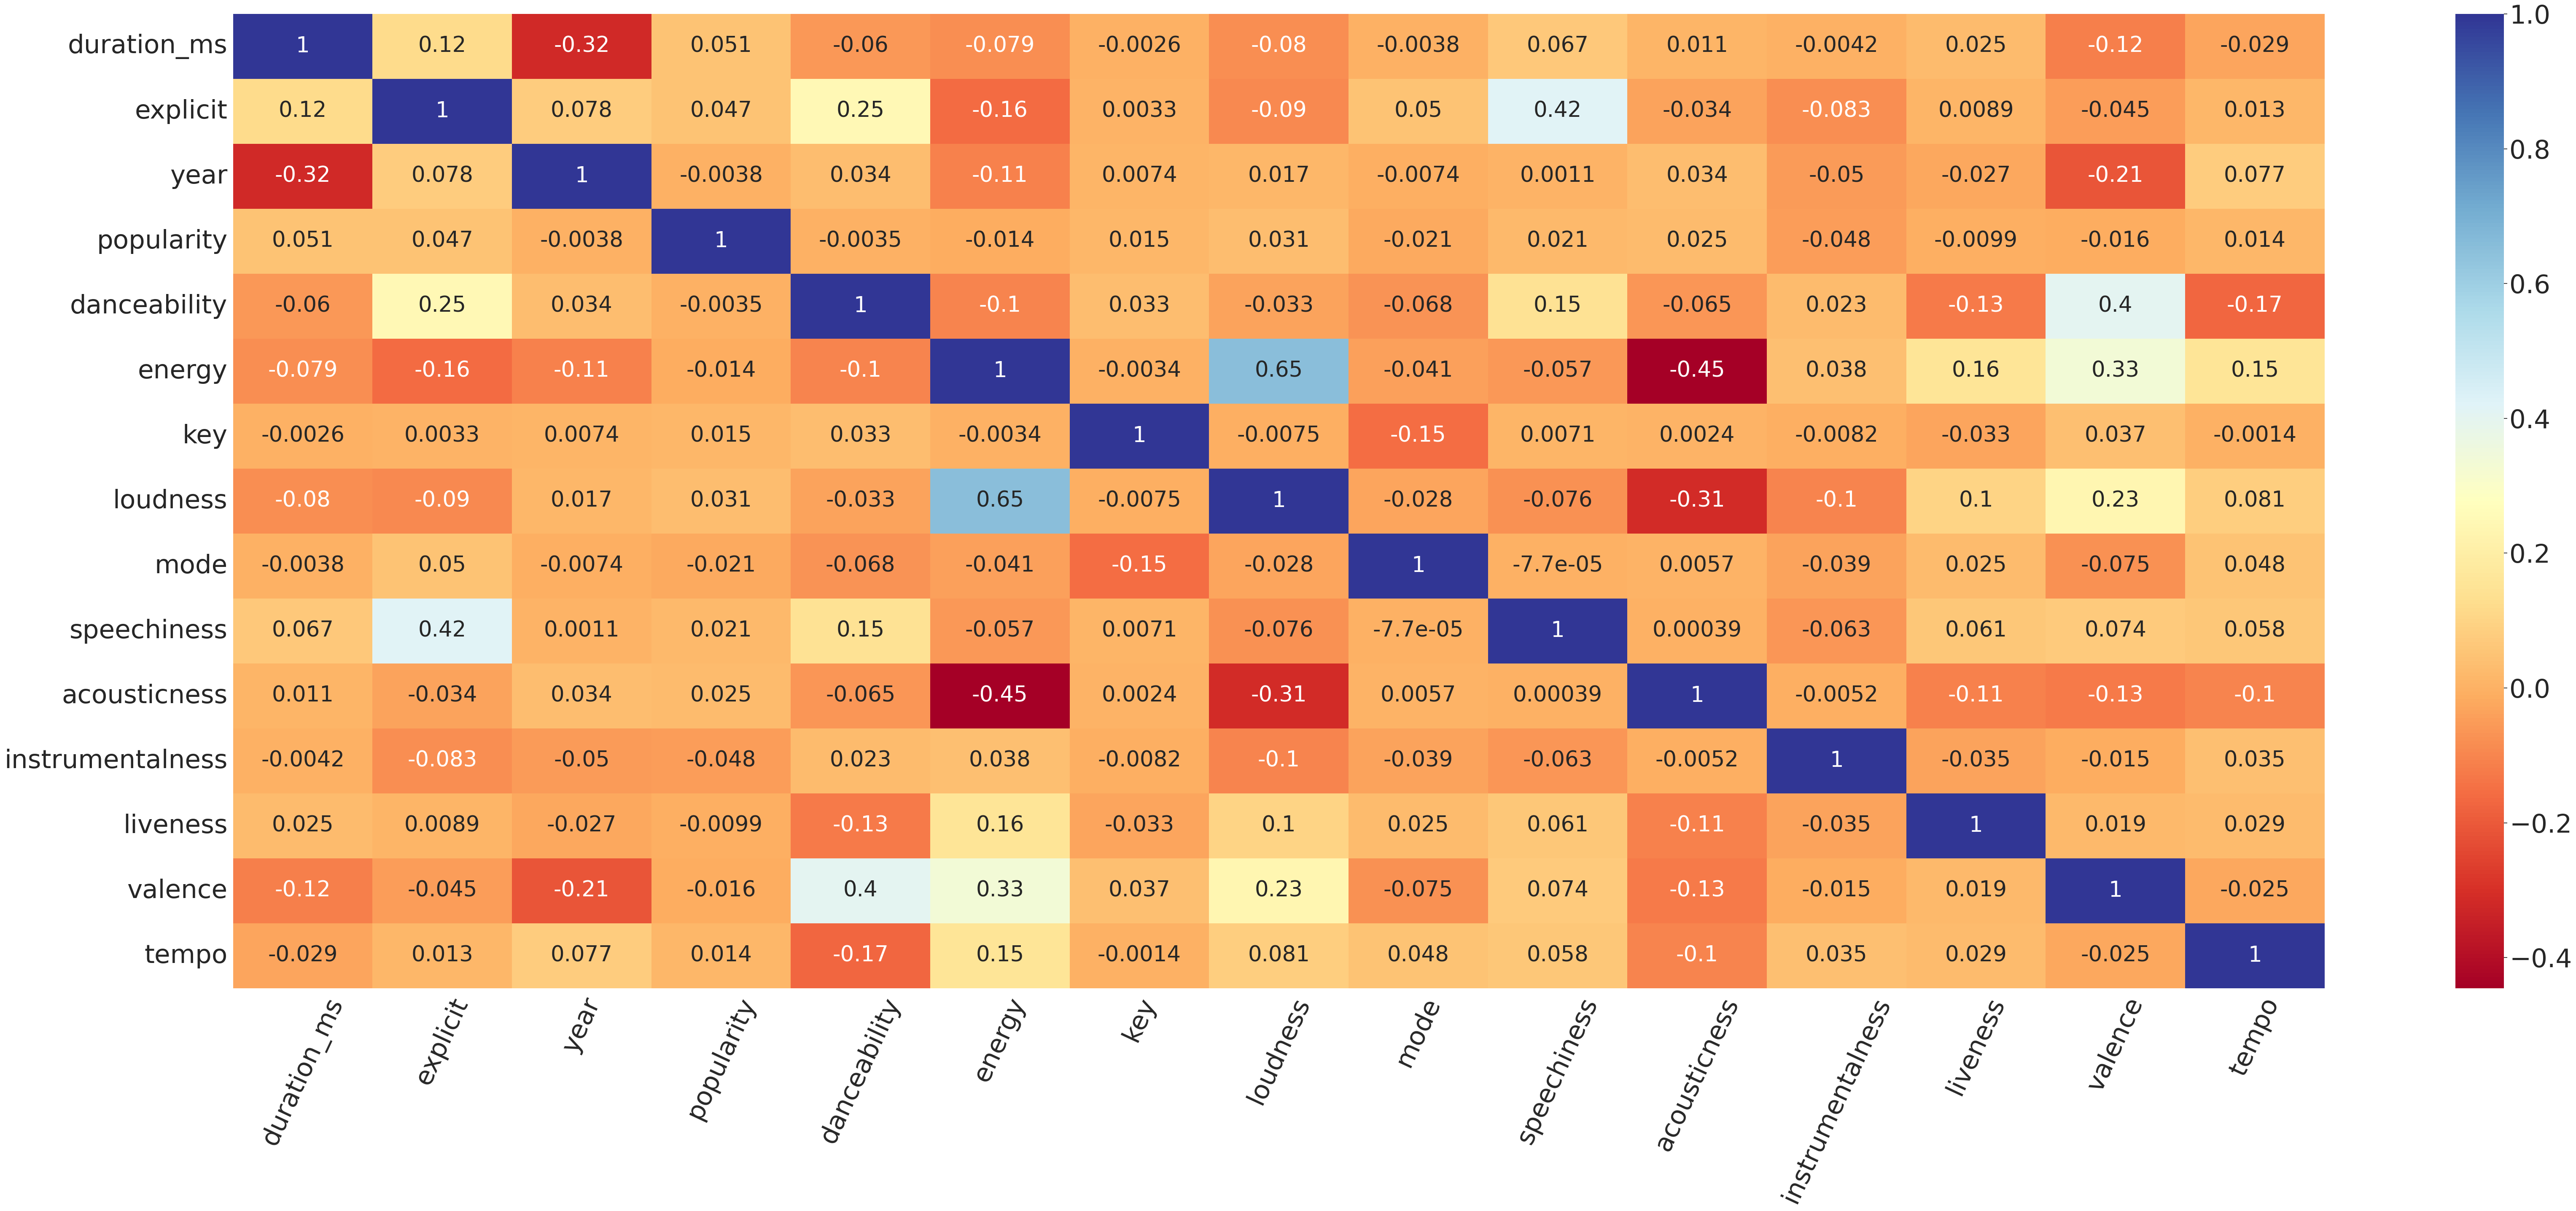

In [32]:
corr = df_cp.corr()

plt.figure(figsize=(80,30))
sns.set(font_scale=4)
sns.heatmap(corr, cmap="RdYlBu",annot=True, annot_kws = {'size': 37})
plt.xticks(rotation=65)
# plt.show()
plt.savefig('corr.png') # energy, dancibility, acousticness, liveness, valance

The correlations based on our df (before adding in the dummies) seem to be okay. There are a couple noteworthy correlations that should be mentioned: <br>

(1) loudness & energy = 0.65 <br>
(2) acousticness & energy = -0.45 <br>
(3) speechiness & explicit = 0.42 <br>
(4) valence & dancibility = 0.4 <br>

These correlations aren't too worrysome (maybe just loudness and energy). If we find it to be an issue in our predictive modeling section we can try to use Principal Component analysis to work around this. <br>

In [33]:
# df_1.columns()

### 2. Data Modelling and Classification

#### 2.1 EDA

In [34]:
df_eda = df_cp[['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','popularity']]

In [35]:
# sns.set(font_scale=1)
# sns.pairplot(df_eda, hue='popularity_group')
# plt.savefig('eda.png')

From the pairplots we can see that the target class is mixed and hard to separate in some variable comparisons.

In [36]:
# from sklearn.feature_selection import mutual_info_classif

# df_2 = df_1.copy()

# plt.figure(figsize=(80,30))
# x_label = df_2.drop(['popularity_group'], axis = 1)   
# y_label = df_2['popularity_group']
# importance = mutual_info_classif(x_label, y_label,random_state=42 )
# sns.set(font_scale=3)
# feat_impo = pd.Series(importance, df_2.columns[0:len(df_2.columns)-1])
# feat_impo.plot(kind='barh')
# # plt.show()
# plt.savefig('feaim.png')

#### 2.2 Modelling

In [63]:
df_2 = df_1.copy()
df_2.columns = df_2.columns.astype(str)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import roc_curve, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedShuffleSplit

In [65]:
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(df_2.drop(columns = 'popularity_group'), 
                                                    df_2["popularity_group"], 
                                                    test_size = 0.3, 
                                                    shuffle=True, 
                                                    random_state = 7610)

Train_Set = X_train.copy()
Train_Set["popularity_group"] = y_train
Train_Set

,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,year_9805,year_0613,year_1420,mode_0,...,folk/acoustic,hip hop,jazz,latin,metal,pop,r&b,rock,world/traditional,popularity_group
1856,0.078872,0.985816,0.308336,0.553661,0.036354,0.000000,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
1621,0.205111,0.640662,0.912086,0.815298,0.028874,0.007736,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1646,0.249479,0.741135,0.565724,0.761982,0.083179,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
588,0.496910,0.445626,0.926915,0.840745,0.132155,0.006924,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1893,0.227501,0.736407,0.476750,0.637069,0.548147,0.000003,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.525074,0.529551,0.735198,0.657130,0.613722,0.011675,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
202,0.354324,0.539007,0.763796,0.722206,0.058588,0.000008,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1509,0.274140,0.540189,0.591145,0.737276,0.004499,0.000186,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
937,0.040200,0.576832,0.765915,0.575304,0.470276,0.939086,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [66]:
# Balancing data – I separated class into 2 classes instead, so, it's quite imbalanceed --> Do data balancing
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 7610)

In [67]:
X_train_sm = Train_Set.drop(columns = ['popularity_group'])
y_train_sm = Train_Set[['popularity_group']]

In [68]:
X_res, y_res = sm.fit_resample(X_train_sm, y_train_sm)

In [69]:
Train_Set = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set = Train_Set.sample(frac = 1, random_state = 420)
Train_Set.reset_index(drop = True, inplace = True)

In [70]:
Train_Set
# Train_Set['popularity_group'].value_counts()

,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,year_9805,year_0613,year_1420,mode_0,...,folk/acoustic,hip hop,jazz,latin,metal,pop,r&b,rock,world/traditional,popularity_group
0,0.352923,0.599291,0.532888,0.663998,0.473350,0.000000,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0.230098,0.874704,0.881368,0.791037,0.061969,0.000000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.443726,0.633570,0.835822,0.709062,0.009847,0.000218,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.286141,0.612293,0.789217,0.747604,0.066273,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0.439143,0.536643,0.819934,0.786194,0.008833,0.000000,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.245941,0.419622,0.716132,0.682874,0.441587,0.000000,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
1340,0.404296,0.865248,0.475691,0.632819,0.004202,0.000018,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1341,0.197310,0.730496,0.620803,0.791185,0.256133,0.001086,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1342,0.379220,0.491726,0.629277,0.812926,0.146500,0.000016,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [71]:
X_train = Train_Set.drop(columns = ['popularity_group'])
y_train = Train_Set[['popularity_group']]

---

##### 2.2.1 Logistic Regression

In [72]:
# 2.3.1 Logistic Regression

logreg = LogisticRegression()
mod = logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# w0 = mod.intercept_[0]
# w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27, w28, w29, w30, w31, w32, w33, w34, w35, w36, w37, w38, w39, w40, w41, w42, w43  = mod.coef_[0]
# equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4) + (%f * x5) + (%f * x6) + (%f * x7) + (%f * x8) + (%f * x9) + (%f * x10) + (%f * x11) + (%f * x12) + (%f * x13) + (%f * x14) + (%f * x15) + (%f * x16) + (%f * x17) + (%f * x18) + (%f * x19) + (%f * x20) + (%f * x21) + (%f * x22) + (%f * x23) + (%f * x24) + (%f * x25) + (%f * x26) + (%f * x27) + (%f * x28) + (%f * x29) + (%f * x30) + (%f * x31) + (%f * x32) + (%f * x33) + (%f * x34) + (%f * x35) + (%f * x36) + (%f * x37) + (%f * x38) + (%f * x39) + (%f * x40) + (%f * x41) + (%f * x42) + (%f * x43)" % (w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25, w26, w27, w28, w29, w30, w31, w32, w33, w34, w35, w36, w37, w38, w39, w40, w41, w42, w43)
# print(equation)

In [74]:
w0 = mod.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25  = mod.coef_[0]
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4) + (%f * x5) + (%f * x6) + (%f * x7) + (%f * x8) + (%f * x9) + (%f * x10) + (%f * x11) + (%f * x12) + (%f * x13) + (%f * x14) + (%f * x15) + (%f * x16) + (%f * x17) + (%f * x18) + (%f * x19) + (%f * x20) + (%f * x21) + (%f * x22) + (%f * x23) + (%f * x24) + (%f * x25)" % (w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25)
print(equation)

y = 0.034820 + (0.295464 * x1) + (0.199732 * x2) + (-0.935784 * x3) + (0.906606 * x4) + (0.680999 * x5) + (-0.974237 * x6) + (-0.614613 * x7) + (0.039615 * x8) + (0.566422 * x9) + (0.087991 * x10) + (-0.096568 * x11) + (-0.724637 * x12) + (-0.725805 * x13) + (-0.629610 * x14) + (-0.598548 * x15) + (-0.851871 * x16) + (0.110067 * x17) + (0.431543 * x18) + (-0.169781 * x19) + (0.162270 * x20) + (0.834762 * x21) + (-0.439453 * x22) + (-0.330246 * x23) + (0.253409 * x24) + (-0.808177 * x25)


<Figure size 20000x8000 with 0 Axes>

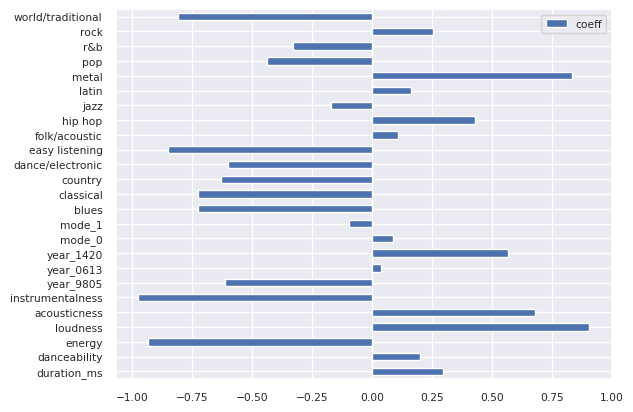

In [111]:
# coeff_from_logreg = list(mod.coef_)[0]
sum_coeff_logreg = pd.DataFrame(w, index = X_train.columns, columns =['coeff'])
sum_coeff_logreg.to_csv("feaim.csv")
sns.set(font_scale=0.7)
plt.figure(figsize=(200,80))
ax = sum_coeff_logreg.plot.barh()
# sum_coeff_logreg
plt.savefig('log_feaim.png')
# sum_coeff_logreg

```
import math

feature_importance = pd.DataFrame(X_train.columns, columns = ["feature"])

feature_importance["importance"] = pow(math.e, w)
# feature_importance = feature_importance.sort_values(by = ["importance"])
feature_importance.to_csv("feaim2.csv")
ax = feature_importance.plot.barh(x='feature', y='importance')
# plt.show()
plt.savefig('log_feaim2.png')
```
```
feature_importance = pd.DataFrame(sum_coeff_logreg.coeff, index = X_train.columns, columns = ["coeff"])
feature_importance.index = sum_coeff_logreg.index
feature_importance["coeff"] = sum_coeff_logreg.coeff
feature_importance["importance"] = feature_importance["coeff"]
z
for index, row in feature_importance.iterrows():
  if w[index] < 0:
    row["importance"] = pow(math.e, -w[index])
  else:
    row["importance"] = pow(math.e, w[index])

feature_importance
```

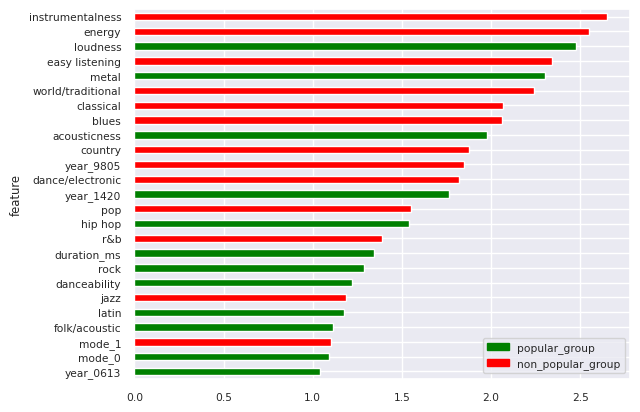

In [130]:
import math

feature_importance = pd.DataFrame(X_train.columns, columns = ["feature"])
feature_importance["importance"] = feature_importance["feature"]

for index, row in feature_importance.iterrows():
  if w[index] < 0:
    row["importance"] = pow(math.e, -w[index])
  else:
    row["importance"] = pow(math.e, w[index])

cooo = sum_coeff_logreg.copy()
cooo.index = feature_importance.index
feature_importance['coeff'] = cooo['coeff']
feature_importance['coeff'] = np.where(feature_importance['coeff'] >= 0, 'popular_group', 'non_popular_group')
feature_importance.to_csv("feaim3.csv")

feature_importance = feature_importance.sort_values("importance")
map_group_color = {'popular_group': "green", 'non_popular_group': "red"}

ax = feature_importance.plot.barh(x='feature', y='importance', color = feature_importance.coeff.replace(map_group_color))

import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=group)
                  for group, color in map_group_color.items()]
ax.legend(handles=legend_handles)

# plt.show()
plt.savefig('log_feaim3.png')

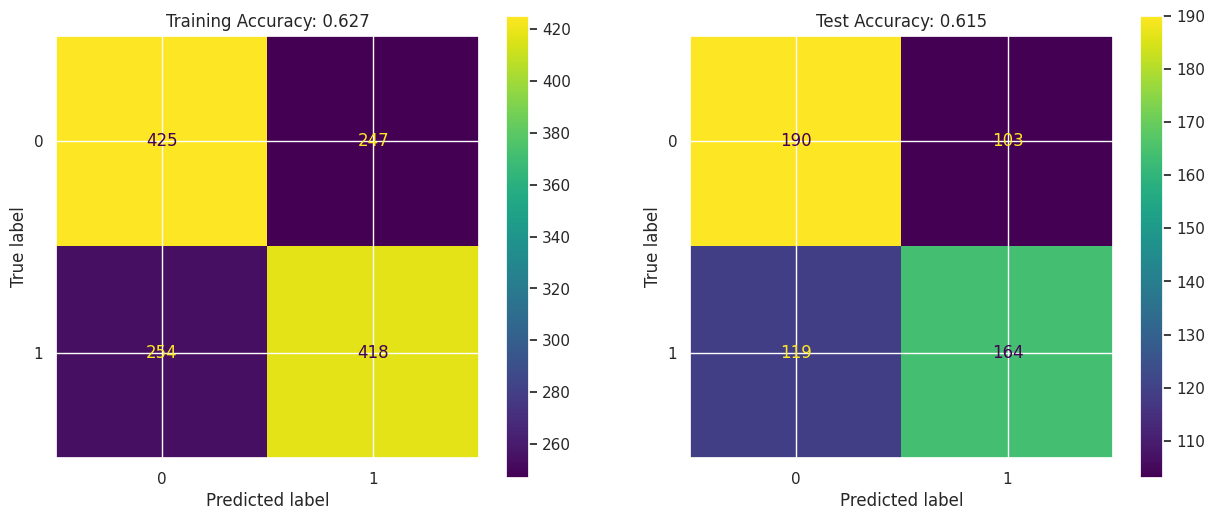

In [51]:
Acc_train = logreg.score(X_train, y_train)
Acc_test = logreg.score(X_test, y_test)

Y_train_hat = logreg.predict(X_train)
Y_test_hat = logreg.predict(X_test)
cm_train = confusion_matrix(y_train, Y_train_hat)
cm_test = confusion_matrix(y_test, Y_test_hat)

sns.set(font_scale=1)
fig1, axes1 = plt.subplots(1, 2, figsize=(15, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=logreg.classes_)
disp.plot(ax=axes1[0])
axes1[0].set_title(f'Training Accuracy: {Acc_train:.3f}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=logreg.classes_)
disp.plot(ax=axes1[1])
_ = axes1[1].set_title(f'Test Accuracy: {Acc_test:.3f}')
plt.savefig('LR_confusion.png')

In [52]:
print(classification_report(y_test, Y_test_hat))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       293
           1       0.61      0.58      0.60       283

    accuracy                           0.61       576
   macro avg       0.61      0.61      0.61       576
weighted avg       0.61      0.61      0.61       576



---

##### 2.2.2 Decision Tree

In [53]:
# 2.2.2 Decision Tree

detree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
detree.fit(X_train, y_train)

print('Training set score: {:.4f}'.format(detree.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(detree.score(X_test, y_test)))

Training set score: 0.6101
Test set score: 0.6042


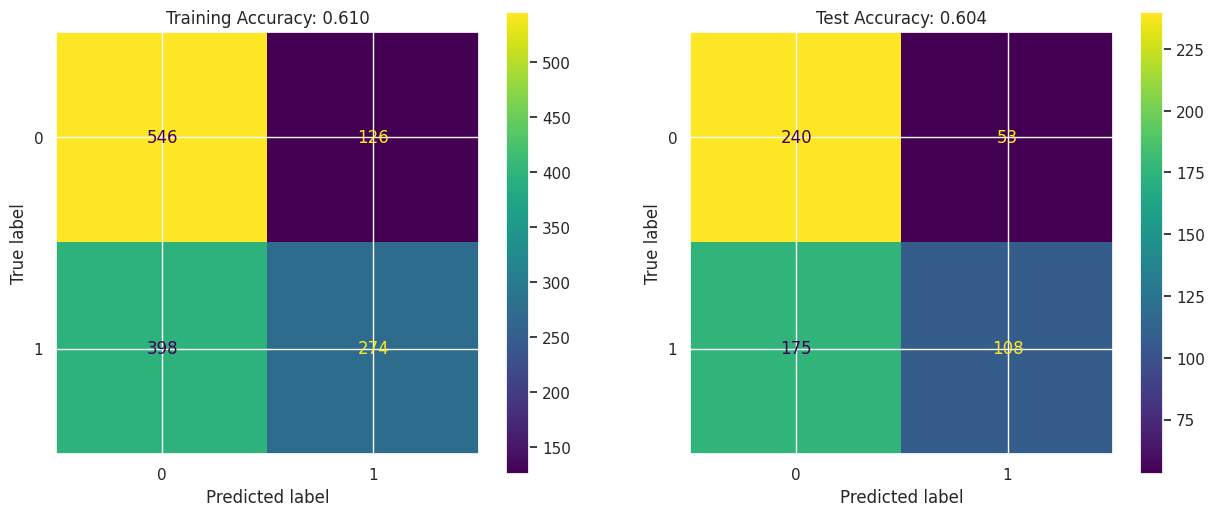

In [54]:
Acc_train = detree.score(X_train, y_train)
Acc_test = detree.score(X_test, y_test)

y_train_hat = detree.predict(X_train)
y_test_hat = detree.predict(X_test)

detreecm_train = confusion_matrix(y_train, y_train_hat)
detreecm_test = confusion_matrix(y_test, y_test_hat)

sns.set(font_scale=1)
fig2, axes2 = plt.subplots(1, 2, figsize=(15, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=detreecm_train, display_labels=detree.classes_)
disp.plot(ax=axes2[0])
axes2[0].set_title(f'Training Accuracy: {Acc_train:.3f}')

disp = ConfusionMatrixDisplay(confusion_matrix=detreecm_test, display_labels=detree.classes_)
disp.plot(ax=axes2[1])
_ = axes2[1].set_title(f'Test Accuracy: {Acc_test:.3f}')
plt.savefig('DT_confusion.png')

In [55]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       293
           1       0.67      0.38      0.49       283

    accuracy                           0.60       576
   macro avg       0.62      0.60      0.58       576
weighted avg       0.62      0.60      0.58       576



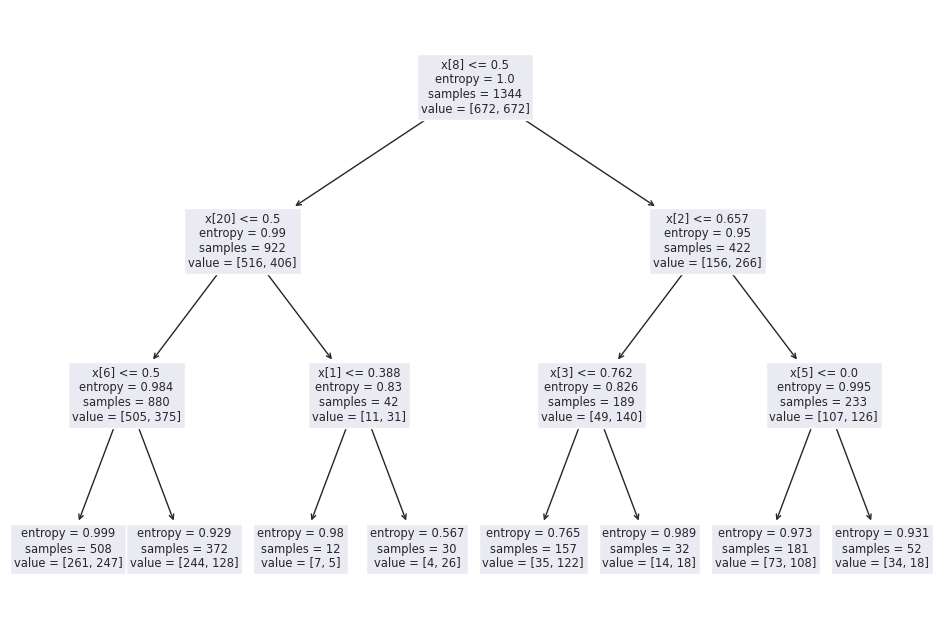

In [56]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(detree.fit(X_train, y_train))
plt.savefig('DT_tree.png')

---

##### 2.2.3 Random Forest

In [57]:
# 2.3.3 Random Forest

RF = RandomForestClassifier() #n_estimators=10
RF.fit(X_train, y_train)

<ipython-input-57-992d386ba5d3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)


RandomForestClassifier()

Training set score: 0.9978
Test set score: 0.6406


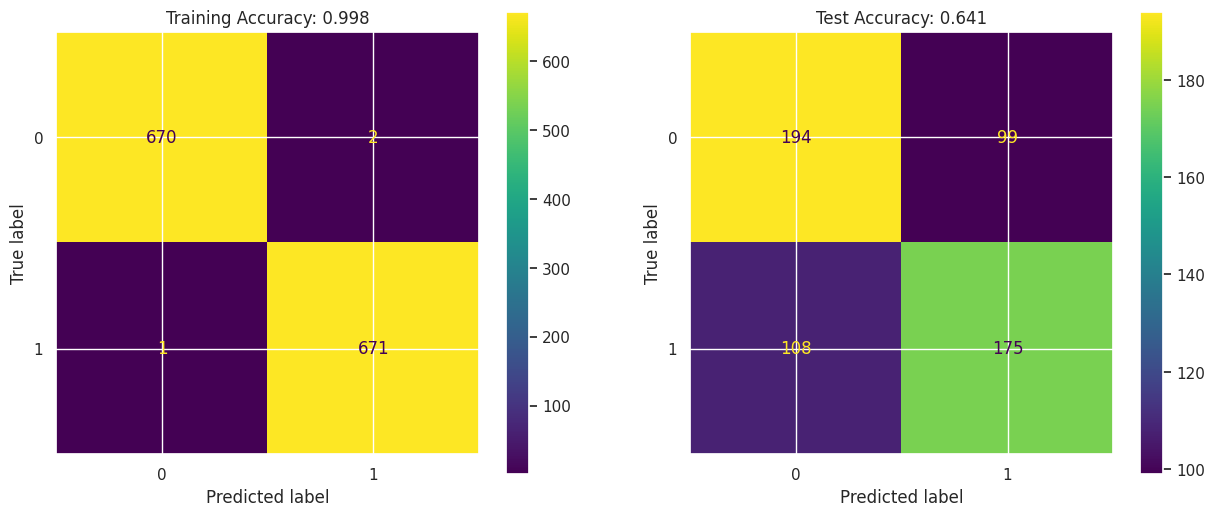

In [58]:
Acc_train = RF.score(X_train, y_train)
Acc_test = RF.score(X_test, y_test)

yrf_train_hat = RF.predict(X_train)
yrf_test_hat = RF.predict(X_test)

print('Training set score: {:.4f}'.format(RF.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(RF.score(X_test, y_test)))

RFcm_train = confusion_matrix(y_train, yrf_train_hat)
RFcm_test = confusion_matrix(y_test, yrf_test_hat)

sns.set(font_scale=1)
fig3, axes3 = plt.subplots(1, 2, figsize=(15, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=RFcm_train, display_labels=RF.classes_)
disp.plot(ax=axes3[0])
axes3[0].set_title(f'Training Accuracy: {Acc_train:.3f}')

disp = ConfusionMatrixDisplay(confusion_matrix=RFcm_test, display_labels=RF.classes_)
disp.plot(ax=axes3[1])
_ = axes3[1].set_title(f'Test Accuracy: {Acc_test:.3f}')
plt.savefig('RF_confusion.png')

In [59]:
print(classification_report(y_test, yrf_test_hat))
# reportt = pd.DataFrame(classification_report(y_test, yrf_test_hat, output_dict=True)).T
# reportt

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       293
           1       0.64      0.62      0.63       283

    accuracy                           0.64       576
   macro avg       0.64      0.64      0.64       576
weighted avg       0.64      0.64      0.64       576



In [60]:
# Extract single tree
estimator = RF.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = 'popularity_group',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

### 3. Interpretation – just copied from many sources

- Log Reg:  Train_Acc 0.627,  Test_Acc 0.615

-----> difference = 0.012 , Moderate Train and Test Accuracy, but least overfitting

- DT:       Train_Acc 0.610,  Test_Acc 0.604 

-----> difference = 0.006 ,  Least Train and Test Accuracy

- RF:  Train_Acc 0.998,    Test_Acc 0.630 

-----> difference = 0.368 The Most Overfitting, but Best Test Accuracy

---

 it is more robust as it reduces the spread of the predictions and model performance.

Music analysis is a diverse field and also an interesting one, Music information retrieval (MIR) is the interdisciplinary science, revolve around musicology, psychoacoustics, psychology, signal processing, informatics, machine learning, optical music recognition, computational intelligence or some combination of these.

Mood classification --> basis of the Music Recommender systems based on the mood, and The **musical generative AI** is a goal held by many MIR researchers

Future:  feature extraction, especially when the audio content, the key, chords, harmonies, melody, main pitch, beats per minute or rhythm in the piece

Possible solutions to Overfitting that were attempted:

adding more Data
removing outliers
dimensionality reduction (via PCA)

With these model, we can correctly predict around 60-70% of 'popularity_group' for our bar-owning friend's clientelle. Since our model's accuracy was still relatively low, we would also suggest that the bar-owner collect data from their patrons about new songs that were chosen as 'Suitable', and see if it was preferred or disliked. 

Human aestetic and emotional capability in music is complicated and subjective, it will be up to the owner to make decisions about what genres to include in their playlists and pay close attention to the response from their guests. Hopefully this model helps bring great music to their bar!